# 무엇을 찾고자 하는가
## 현재 이미지가 컬러인가 아닌가
## 픽셀의 rgb 컴포넌트별 변화를 보자
- gray scale 은 |r-b|+|b-g|+|g-r| 이 0 에 가깝다

## 이전에 비해 현재 이미지 밝기가 크게 달라졌는가 
- t-1 과 t 의 밝기 차이가 많이 나는가?
  - histogram 이 많이 차이나는가?
  - 차이가 나지 않는 histogram 와 차이가 나는 histogram 을 분류하자
    - 같은 영상끼리 클래스로 나누자
    - 각 영상에서 histogram 을 모델로 만들자

# 데이터
## training
    - C:\Users\k\Workspace\sdetector\data\image\20200517\images
    - C:\Users\k\Workspace\sdetector\data\image\20200516\images

## test
    - 나머지
    

## label
    - scene_0 ~ scene_n


In [11]:
import cv2
import numpy as np
from color_model import *
from sdetector import VideoFrame

resultdir='data/classification-color'
if not os.path.exists(resultdir):
    os.mkdir(resultdir)
    
# filename='data/filelist-all.txt'
filename='data/ccd.txt'
filelist=read_filelist(filename)
for f in filelist:
    frame=read_image(f)
    vframe=VideoFrame(f, 0)
    vframe.check_ir()
    if not frame.is_ir:
        dstfile=os.path.join(resultdir, os.path.basename(f))
        os.symlink(f, dstfile)

data/image/20200515/images/P20051508232910.jpgc : not exists


In [10]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import random
from scipy.stats import skewnorm, norm, expon

# ccd : color 컴포넌트 variation 이 크다
# ir :  color 컴포넌트 variation 이 작다

# 픽셀의 채널 variation?
# 전체 이미지에서 픽셀의 variation?

# histogram equalization
ccd_file='./image/20200514/images/P20051421541510-CCD.jpg'
ir_file='./image/20200514/images/P20051421473810.jpg'

In [110]:
def read_image(filepath):
    img=cv2.imread(filepath)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# height, width, depth
print(ccd_img.shape)
print(ir_img.shape)
ccd_img.shape[1]
range(ccd_img.shape[1])

In [6]:
# test
# data=norm.rvs(10.0, 2.5, size=500)
# show_distribution(data, norm.pdf, *(10.0, 2.5))

# data=skewnorm.rvs(10.0, 2.5, size=500)
# show_distribution(data, skewnorm.pdf, *(10.0, 2.5))
def show_distribution(data, pdf, *args):

    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    n=len(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, n)
    p=pdf(x, *args)
    plt.plot(x, p, 'k', linewidth=2)
#     title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#     plt.title(title)

normal distribution : mean=0.07 stddev=0.54
skewed normal distribution : shape=1407371.12 location=-0.00 scale=0.54
normal distribution : mean=31.19 stddev=25.17
skewed normal distribution : shape=11.59 location=2.78 scale=37.96


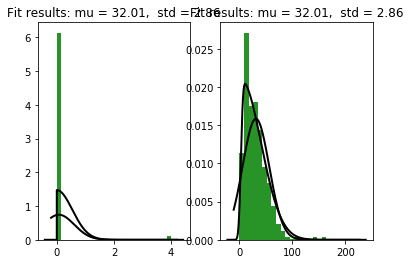

In [171]:
plt.subplot(1, 2, 1)
learn('./ir.txt', True)
plt.subplot(1, 2, 2)
learn('./ccd.txt', True)

In [160]:
# filelist: './ccd.txt' or './ir.txt'
def learn(filelist, show_dist=True):
    data=[]
    with open(filelist) as fd:
        for line in fd.readlines():
            filename=line.strip()
            if len(filename) < 1:
                continue

            if not os.path.exists(filename):
                print(f'{filename} : not exists')
                continue

            img=read_image(filename)
            data=data+get_pixel_statistics(img, 5)

    mu, sig=norm.fit(data)
    print(f'normal distribution : mean={mu:.2f} stddev={sig:.2f}')
    # 0.07 0.53
    if show_dist:
        show_distribution(data, norm.pdf, *(mu, sig))
    
    shape, location, scale = skewnorm.fit(data)
    print(f'skewed normal distribution : shape={shape:.2f} location={location:.2f} scale={scale:.2f}')
    if show_dist:
        show_distribution(data, skewnorm.pdf, *(shape, location, scale))


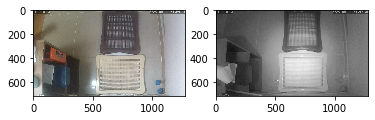

In [21]:
ccd_img=read_image(ccd_file)
ir_img=read_image(ir_file)

plt.subplot(1, 2, 1)
plt.imshow(ccd_img)
plt.subplot(1, 2, 2)
plt.imshow(ir_img)
plt.show()

(10.000939176100008, 2.530815097662291)


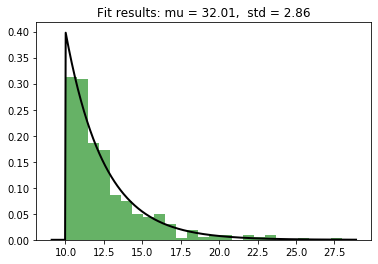

In [175]:
data=expon.rvs(10.0, 2.5, size=500)
res=expon.fit(data)
print(res)
show_distribution(data, expon.pdf, *(10.0, 2.5))

0.0

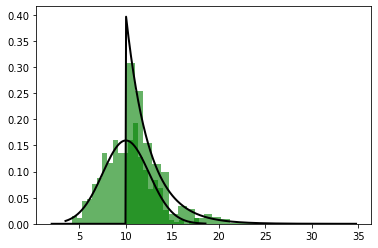

In [7]:
data=norm.rvs(10.0, 2.5, size=500)
show_distribution(data, norm.pdf, *(10.0, 2.5))

data=expon.rvs(10.0, 2.5, size=500)
show_distribution(data, expon.pdf, *(10.0, 2.5))

In [27]:
# height, width, depth
print(ccd_img.shape)
print(ir_img.shape)
ccd_img.shape[1]
range(ccd_img.shape[1])

(720, 1280, 3)
(720, 1280, 3)


range(0, 1280)

Text(0.5, 1.0, 'Fit results: mu = 32.01,  std = 2.86')

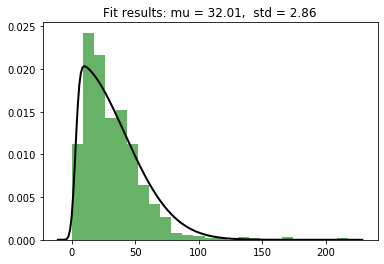

In [128]:
#data=get_pixel_statistics(ccd_img, 500)
    
# ae, loce, scalee = skewnorm.fit(data)

ae, loce, scalee=(14.49, 2.89, 38.40)
# ae=362686.54
# loce=-0.00
# scalee=0.58

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

In [130]:
skewnorm.pdf(35, ae, loce, scalee)

0.014647841530776093

In [94]:
import random
from scipy.stats import skewnorm

def get_pixel_statistics(img, nsamples):
    w=img.shape[1]
    h=img.shape[0]
    widx=list(range(w))
    hidx=list(range(h))

    random.shuffle(widx)
    random.shuffle(hidx)

    var=[]
    for x, y in zip(widx[:nsamples], hidx[:nsamples]):
        px=img[y, x].astype(int)
        epx=[px[0], px[1], px[2], px[0]]
        d=0
        for i in range(len(epx)-1):
            d+=abs(epx[i]-epx[i+1])
        var.append(d)

    return var
    

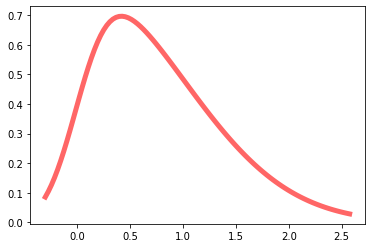

In [87]:
fig, ax = plt.subplots(1, 1)
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)

ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

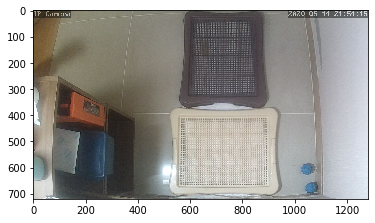

In [14]:
ccd_img

array([[[ 37,  54,  63],
        [ 28,  45,  54],
        [ 33,  50,  59],
        ...,
        [112, 109, 104],
        [106, 103,  98],
        [115, 112, 107]],

       [[ 24,  41,  50],
        [ 41,  58,  67],
        [ 30,  47,  56],
        ...,
        [109, 106, 101],
        [115, 112, 107],
        [100,  97,  92]],

       [[ 37,  54,  63],
        [ 30,  47,  56],
        [ 30,  47,  56],
        ...,
        [106, 103,  98],
        [120, 117, 112],
        [110, 107, 102]],

       ...,

       [[186, 191, 192],
        [187, 192, 193],
        [189, 194, 195],
        ...,
        [240, 231, 222],
        [239, 230, 221],
        [239, 230, 221]],

       [[185, 190, 191],
        [186, 191, 192],
        [188, 193, 194],
        ...,
        [242, 233, 224],
        [241, 232, 223],
        [240, 231, 222]],

       [[186, 191, 192],
        [187, 192, 193],
        [189, 194, 195],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [244, 235, 226]]